<a href="https://colab.research.google.com/github/Pradheepraja/CTI_Report/blob/main/CTI_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📥 Paste your threat report below. Press ENTER twice to finish:

On April 5, 2025, at approximately 02:47 UTC, anomalous outbound traffic was detected from a workstation on the internal network (Hostname: HR-Laptop-07, IP: 192.168.10.45). The traffic was directed to an external IP (91.240.118.221) associated with a known Command & Control (C2) server.


🔍 Extracted IOCs:
IPs:
  - 192.168.10.45
  - 91.240.118.221

🧠 Attack Actions:
  - The traffic was directed to an external IP (91.240.118.221) associated with a known Command & Control (C2) server.

📋 MITRE ATT&CK Table:
╒═════════════════════╤════════════════╤═════════════════════════╕
│ Tactic              │ Technique ID   │ Technique Description   │
╞═════════════════════╪════════════════╪═════════════════════════╡
│ Command and Control │ T1071.001      │ Web Protocols           │
╘═════════════════════╧════════════════╧═════════════════════════╛


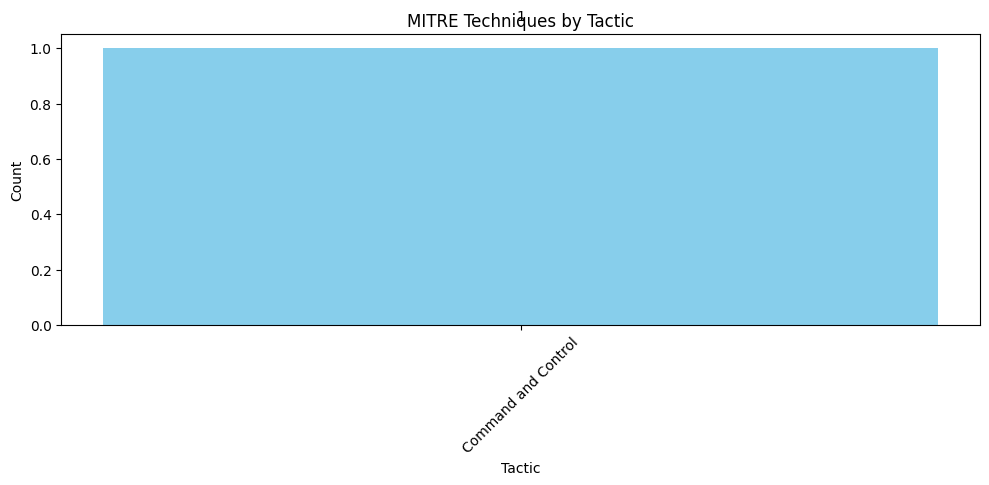


📊 Mermaid Attack Flow (Paste into mermaid.live or Markdown):

```mermaid
graph TD
  A[Command and Control: Web Protocols (T1071.001)]
```


In [2]:
#Here's the full code for execution:
import re
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# =============================
# 🔍 IOC + Action Extractor
# =============================

def extract_iocs(text):
    return {
        "IPs": re.findall(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', text),
        "Domains": re.findall(r'\b(?:[a-z0-9.-]+\.(?:com|org|net|io|co|biz|gov))\b', text),
        "URLs": re.findall(r'(?:h[tx]{2}ps?:\/\/[^\s]+)', text),
        "MD5": re.findall(r'\b[a-fA-F\d]{32}\b', text),
        "SHA1": re.findall(r'\b[a-fA-F\d]{40}\b', text),
        "SHA256": re.findall(r'\b[a-fA-F\d]{64}\b', text)
    }

def extract_action_sentences(text):
    keywords = ["phishing", "macro", "powershell", "registry", "service", "https", "c2", "beacon", "dropper", "mimikatz", "credential", "payload", "command", "download", "execute", "exfiltrate"]
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return [s for s in sentences if any(k in s.lower() for k in keywords)]

# =============================
# 🎯 MITRE ATT&CK Mapper
# =============================

mitre_map = {
    "phishing": ("Initial Access", "T1566.001", "Spearphishing Attachment"),
    "macro": ("Execution", "T1059.005", "Command & Scripting Interpreter: VBScript"),
    "powershell": ("Execution", "T1059.001", "PowerShell"),
    "registry": ("Persistence", "T1547.001", "Registry Run Keys / Startup Folder"),
    "service": ("Persistence", "T1543.003", "Create or Modify System Process: Windows Service"),
    "https": ("Exfiltration", "T1041", "Exfiltration Over HTTPS"),
    "c2": ("Command and Control", "T1071.001", "Web Protocols"),
    "beacon": ("Command and Control", "T1071.001", "Web Protocols"),
    "mimikatz": ("Credential Access", "T1003", "OS Credential Dumping"),
    "credential": ("Credential Access", "T1003", "Credential Dumping"),
    "command": ("Execution", "T1059", "Command and Scripting Interpreter"),
    "download": ("Execution", "T1204.002", "User Execution: Malicious File"),
    "execute": ("Execution", "T1203", "Exploitation for Client Execution"),
    "exfiltrate": ("Exfiltration", "T1041", "Exfiltration Over HTTPS")
}

def map_to_mitre(sentences):
    results = []
    for s in sentences:
        for k, (tactic, tid, desc) in mitre_map.items():
            if k in s.lower():
                results.append({
                    "sentence": s,
                    "tactic": tactic,
                    "technique_id": tid,
                    "description": desc
                })
                break
    return results

# =============================
# 📋 Pretty Print Results
# =============================

def display_iocs(iocs):
    print("\n🔍 Extracted IOCs:")
    for key, values in iocs.items():
        if values:
            print(f"{key}:")
            for v in values:
                print(f"  - {v}")

def display_action_sentences(sentences):
    print("\n🧠 Attack Actions:")
    for s in sentences:
        print(f"  - {s}")

def display_mitre_table(mitre_matches):
    table = [[m['tactic'], m['technique_id'], m['description']] for m in mitre_matches]
    headers = ["Tactic", "Technique ID", "Technique Description"]
    print("\n📋 MITRE ATT&CK Table:")
    print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

def plot_techniques_by_tactic(mitre_matches):
    if not mitre_matches:
        print("\n(No MITRE mappings to plot.)")
        return
    df = pd.DataFrame(mitre_matches)
    counts = df['tactic'].value_counts()

    plt.figure(figsize=(10, 5))
    bars = plt.bar(counts.index, counts.values, color='skyblue')
    plt.title("MITRE Techniques by Tactic")
    plt.xlabel("Tactic")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center')
    plt.tight_layout()
    plt.show()

def generate_mermaid_diagram(mitre_matches):
    print("\n📊 Mermaid Attack Flow (Paste into mermaid.live or Markdown):\n")
    print("```mermaid")
    print("graph TD")
    prev = None
    for i, m in enumerate(mitre_matches):
        node = chr(65 + i)
        label = f"{m['tactic']}: {m['description']} ({m['technique_id']})"
        print(f"  {node}[{label}]")
        if prev:
            print(f"  {prev} --> {node}")
        prev = node
    print("```")

# =============================
# 🚀 Main Entry
# =============================

if __name__ == "__main__":
    print("📥 Paste your threat report below. Press ENTER twice to finish:\n")

    lines = []
    while True:
        try:
            line = input()
            if line.strip() == "":
                break
            lines.append(line)
        except EOFError:
            break

    text = "\n".join(lines)

    iocs = extract_iocs(text)
    actions = extract_action_sentences(text)
    mitre = map_to_mitre(actions)

    display_iocs(iocs)
    display_action_sentences(actions)
    display_mitre_table(mitre)
    plot_techniques_by_tactic(mitre)
    generate_mermaid_diagram(mitre)
